# NBA player age variance analysis
by [Nate Rattner](http://naterattner.com)

This data analysis provided information for my September 25, 2018, Nylon Calculus story ["Breaking down age variance within NBA rosters"](https://fansided.com/2018/09/25/nylon-calculus-age-variance-nba-rosters/) by exploring how player ages vary across the NBA. This notebook is also where I created the swarm plot and other charts included in the piece.

In [48]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
sns.set_context("notebook", font_scale=1.15, rc=None)
##sns.set_style("ticks")

### Getting the data

In [49]:
#Loading roster data from CSV
roster_data = pd.read_csv('nba-roster-data-final.csv')

In [50]:
#Sorting roster data by team
roster_data = roster_data.sort_values(by=['Team'])

### Calculating average age, age variance, and mean age for each team

In [51]:
#Keeping only age info for calculations
age_data = roster_data[['Team','Age']]
age_data

,Team,Age
15,Atlanta Hawks,19
174,Atlanta Hawks,29
21,Atlanta Hawks,41
144,Atlanta Hawks,29
19,Atlanta Hawks,21
18,Atlanta Hawks,20
103,Atlanta Hawks,30
249,Atlanta Hawks,24
178,Atlanta Hawks,25
279,Atlanta Hawks,20


In [52]:
#Calculating average age by team
team_means = age_data.groupby(['Team']).mean()
team_means

,Age
Team,
Atlanta Hawks,25.8
Boston Celtics,25.8
Brooklyn Nets,25.6
Charlotte Hornets,27.1
Chicago Bulls,23.8
Cleveland Cavaliers,26.1
Dallas Mavericks,27.9
Denver Nuggets,25.5
Detroit Pistons,27.6


In [53]:
#Calculating age variance by team
team_vars = age_data.groupby(['Team']).var()
team_vars

,Age
Team,
Atlanta Hawks,45.511111
Boston Celtics,16.844444
Brooklyn Nets,12.711111
Charlotte Hornets,19.877778
Chicago Bulls,11.288889
Cleveland Cavaliers,20.766667
Dallas Mavericks,40.988889
Denver Nuggets,15.611111
Detroit Pistons,22.044444


In [54]:
#Calculating median age by team
team_medians = age_data.groupby(['Team']).median()
team_medians

,Age
Team,
Atlanta Hawks,24.5
Boston Celtics,25.0
Brooklyn Nets,25.5
Charlotte Hornets,26.0
Chicago Bulls,23.0
Cleveland Cavaliers,25.5
Dallas Mavericks,26.5
Denver Nuggets,25.5
Detroit Pistons,27.5


In [55]:
#Joining team average age and age variance info
means_and_vars = pd.merge(team_means, team_vars, on='Team')

#Joining that dataframe to the median age info
age_calcs = pd.merge(means_and_vars, team_medians, on='Team')
age_calcs.columns = ['Avg Age', 'Var', 'Median']

#age_calcs has teams by average age, age variance, and median age
age_calcs

,Avg Age,Var,Median
Team,,,
Atlanta Hawks,25.8,45.511111,24.5
Boston Celtics,25.8,16.844444,25.0
Brooklyn Nets,25.6,12.711111,25.5
Charlotte Hornets,27.1,19.877778,26.0
Chicago Bulls,23.8,11.288889,23.0
Cleveland Cavaliers,26.1,20.766667,25.5
Dallas Mavericks,27.9,40.988889,26.5
Denver Nuggets,25.5,15.611111,25.5
Detroit Pistons,27.6,22.044444,27.5


In [56]:
#Saving list of teams ordered by age variance to order swarm plot by age variance
age_calcs_by_var = age_calcs.sort_values(by=['Var'], ascending=False)
teams_by_var = age_calcs_by_var.index.tolist()

In [57]:
#Saving list of teams ordered by average age to order swarm plot by average age
age_calcs_by_var = age_calcs.sort_values(by=['Avg Age'])
teams_by_avg_age = age_calcs_by_var.index.tolist()

### Swarm Plots

<Figure size 1080x576 with 0 Axes>

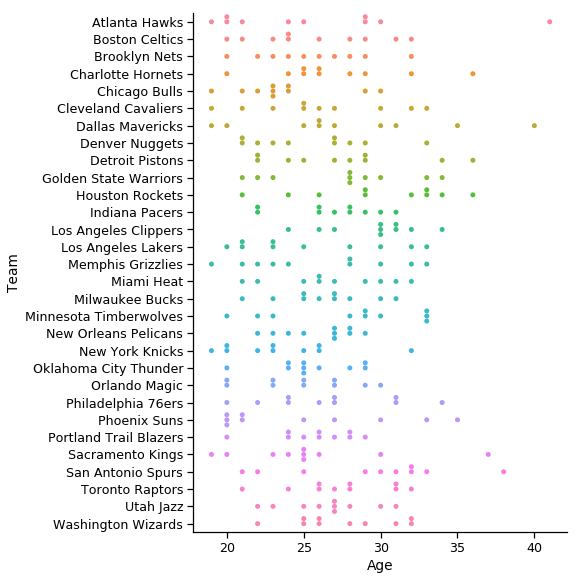

In [58]:
#Swarm plot of teams and player ages, ordered alphabetically
plt.figure(figsize=(15,8))

sns.catplot(x="Age", y="Team", kind="swarm", height=8.27, data=roster_data)

In [71]:
#List of team colors

team_colors = { 'Atlanta Hawks': '#E03A3E', 
                'Boston Celtics': '#007A33',
                'Brooklyn Nets': '#000000', 
                'Charlotte Hornets': '#00788C',
                'Chicago Bulls': '#CE1141', 
                'Cleveland Cavaliers': '#6F263D', 
                'Dallas Mavericks': '#00538C', 
                'Denver Nuggets': '#FEC524', 
                'Detroit Pistons': '#C8102E',
                'Golden State Warriors': '#006BB6', 
                'Houston Rockets': '#CE1141', 
                'Indiana Pacers': '#002D62', 
                'Los Angeles Clippers': '#C8102E', 
                'Los Angeles Lakers': '#FDB927', 
                'Memphis Grizzlies': '#5D76A9', 
                'Miami Heat': '#98002E', 
                'Milwaukee Bucks': '#00471B', 
                'Minnesota Timberwolves': '#236192', 
                'New Orleans Pelicans': '#85714D', 
                'New York Knicks': '#FE5000', 
                'Oklahoma City Thunder': '#007AC1',
                'Orlando Magic': '#9fa8ad', 
                'Philadelphia 76ers': '#006BB6',
                'Phoenix Suns': '#1D1160', 
                'Portland Trail Blazers': '#E03A3E',
                'Sacramento Kings': '#5A2D81', 
                'San Antonio Spurs': '#9fa8ad',
                'Toronto Raptors': '#CE1141', 
                'Utah Jazz': '#002B5C',
                'Washington Wizards': '#E31837'}

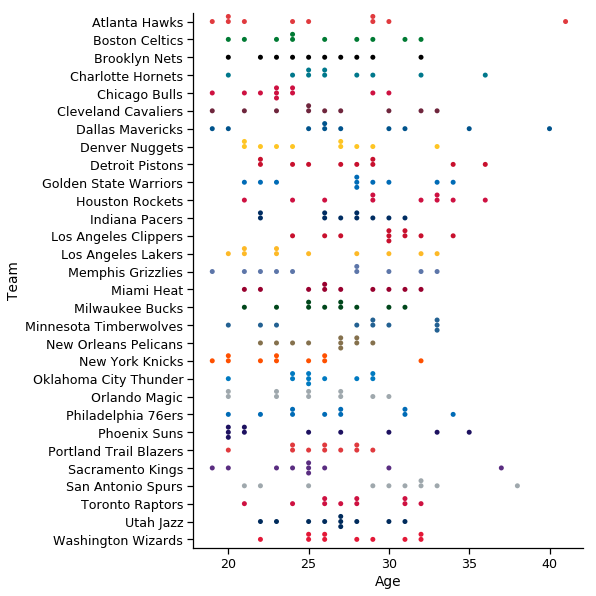

In [72]:
#Swarm plot using team colors, ordered alphabetically
sns.catplot(x="Age", y="Team", kind="swarm", height=8.5, data=roster_data, palette=team_colors)

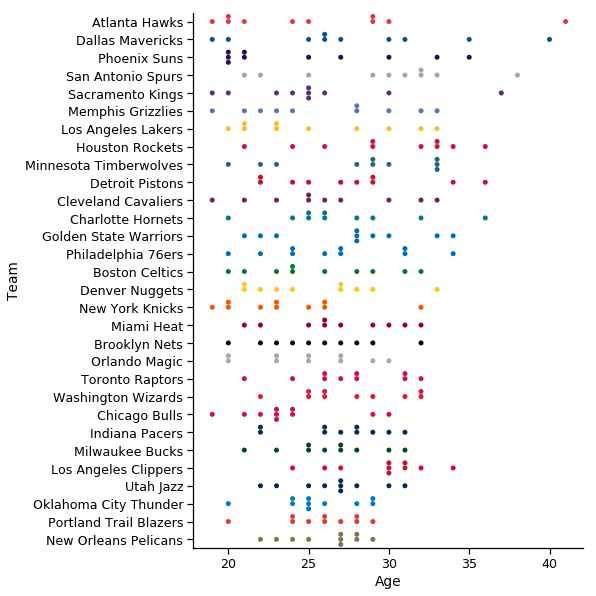

In [73]:
#Swarm plot with teams ordered by age variance, from most variance to least variance
sns.catplot(x="Age", y="Team", kind="swarm", height=8.5, data=roster_data, palette=team_colors, order=teams_by_var)
plt.savefig('team_variance.eps', format='eps', dpi=1200)

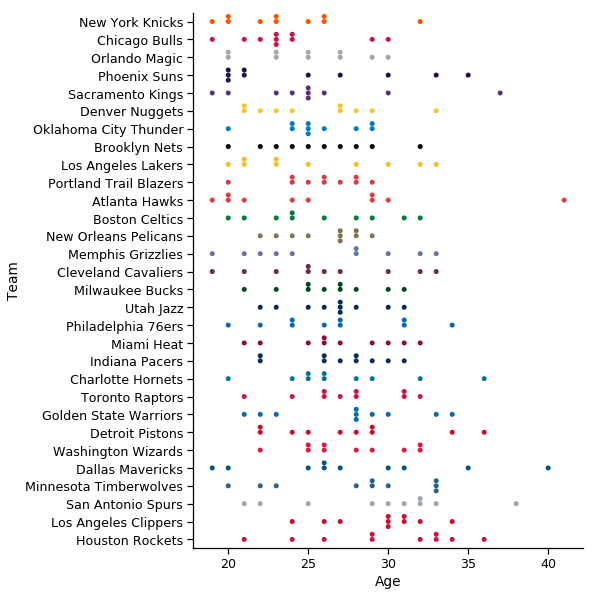

In [62]:
#Swarm plot with teams ordered by average age, from lowest average age to highest
sns.catplot(x="Age", y="Team", kind="swarm", height=8.5, data=roster_data, palette=team_colors, order=teams_by_avg_age)

### Dot Plots

In [63]:
roster_data

,Team,Player,Pos,Ht,Wt,Birth Date,Exp,College,MP,Age
15,Atlanta Hawks,Trae Young,G,6-2,180,"September 19, 1998",R,University of Oklahoma,NaN,19
174,Atlanta Hawks,Dewayne Dedmon,C,7-0,245,"August 12, 1989",5,University of Southern California,24.9,29
21,Atlanta Hawks,Vince Carter,G-F,6-6,220,"January 26, 1977",20,University of North Carolina,17.7,41
144,Atlanta Hawks,Kent Bazemore,G-F,6-5,201,"July 1, 1989",6,Old Dominion University,27.5,29
19,Atlanta Hawks,Omari Spellman,F,6-9,245,"July 21, 1997",R,Villanova University,NaN,21
18,Atlanta Hawks,Kevin Huerter,G,6-7,190,"August 27, 1998",R,University of Maryland,NaN,20
103,Atlanta Hawks,Jeremy Lin,G,6-3,200,"August 23, 1988",8,Harvard University,25.0,30
249,Atlanta Hawks,Taurean Prince,F,6-8,220,"March 22, 1994",2,Baylor University,30.0,24
178,Atlanta Hawks,Alex Len,C,7-1,260,"June 16, 1993",5,University of Maryland,20.2,25
279,Atlanta Hawks,John Collins,F,6-10,235,"September 23, 1997",1,Wake Forest University,24.1,20


In [64]:
#Pull Team, Player, and Age from roster_data
team_data = roster_data[['Team', 'Player','Age']]

#Create datasets for each of the top 5 teams, sorted by age

#Atlanta Hawks
atlanta_hawks = team_data.loc[team_data['Team'] == 'Atlanta Hawks'].sort_values(by=['Age'], ascending=False)

#Dallas Mavericks
dallas_mavericks = team_data.loc[team_data['Team'] == 'Dallas Mavericks'].sort_values(by=['Age'], ascending=False)

#Phoenix Suns
phoenix_suns = team_data.loc[team_data['Team'] == 'Phoenix Suns'].sort_values(by=['Age'], ascending=False)

#San Antonio Spurs
san_antonio_spurs = team_data.loc[team_data['Team'] == 'San Antonio Spurs'].sort_values(by=['Age'], ascending=False)

#Sacramento Kings
sacramento_kings = team_data.loc[team_data['Team'] == 'Sacramento Kings'].sort_values(by=['Age'], ascending=False)

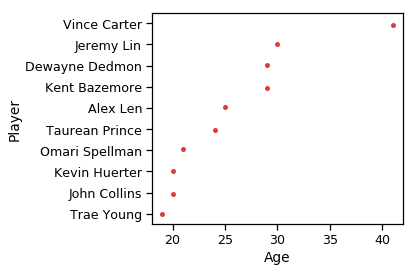

In [65]:
sns.stripplot(x="Age", y="Player", data=atlanta_hawks, color='#E03A3E');
plt.xlim(18, 42)
plt.tight_layout()
plt.savefig('atanta_hawks.eps', format='eps', dpi=1200)

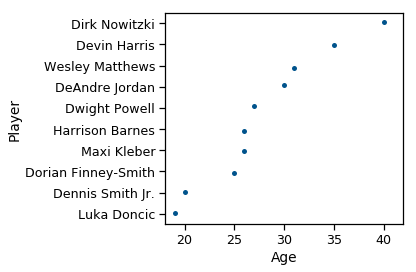

In [66]:
sns.stripplot(x="Age", y="Player", data=dallas_mavericks, color='#00538C');
plt.xlim(18, 42)
plt.tight_layout()
plt.savefig('dallas_mavericks.eps', format='eps', dpi=1200)

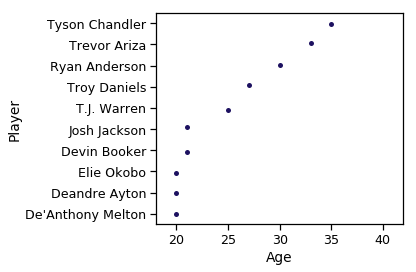

In [67]:
sns.stripplot(x="Age", y="Player", data=phoenix_suns, color='#1D1160');
plt.xlim(18, 42)
plt.tight_layout()
plt.savefig('phoenix_suns.eps', format='eps', dpi=1200)

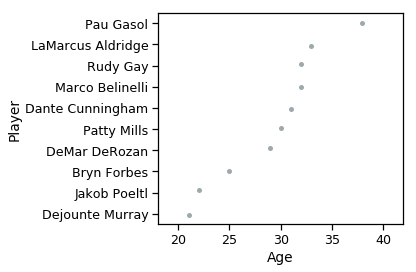

In [68]:
sns.stripplot(x="Age", y="Player", data=san_antonio_spurs, color='#9fa8ad');
plt.xlim(18, 42)
plt.tight_layout()
plt.savefig('san_antonio_spurs.eps', format='eps', dpi=1200)

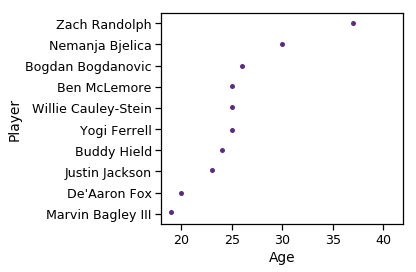

In [69]:
sns.stripplot(x="Age", y="Player", data=sacramento_kings, color='#5A2D81');
plt.xlim(18, 42)
plt.tight_layout()
plt.savefig('sacramento_kings.eps', format='eps', dpi=1200)